### Innomatics Reasearch Lab

Machine learning Assignment -1
<br>Implementing K-Nearest Neighbor(KNN) Algorithm from scratch

<br>Dataset-"Diamond"


<br>1. Title : Diamonds Dataset

<br>2. the 7th column "price" is the values to be predicted.

<br>3. Data Type : Mixed ( Numerical + Categorical)

<br>4. Dataset has nearly 54000 instances.

<br>5. It has 10 features.

<br>6. Discription Of Feature
<li>price : price in US dollars (\$326 to \$18,823)</li>

<li>carat : weight of the diamond (0.2 to 5.01)</li>

<li>cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)</li>

<li>color : diamond colour, from J (worst) to D (best)</li>

<li>clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))</li>

<li>x : length in mm (0 to 10.74)</li>

<li>y : width in mm (0 to 58.9)</li>

<li>z : depth in mm (0 to 31.8)</li>

<li>depth : total depth percentage = $\frac{z}{mean(x, y)} =\frac{2 \times z}{(x + y)}$ (43 to 79)</li>

<li>table : width of top of diamond relative to widest point (43 to 95)</li>

<br>7. Caution : Handle Categorical data before building a model. 


### Categorical Features : Clarity, Cut and Color

### Continuous Features: Price, Carat,Total Depth Percentage,Table,Length, Width, Depth

![title](DiamondAnatomy.jpg)
Diamond Anatomy

### Introduction:
K Nearest Neighbor algorithm falls under the Supervised Learning category and is used for classification (most commonly) and regression. It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.
<br>The algorithm’s learning is:

1. Instance-based learning: Here we do not learn weights from training data to predict output (as in model-based algorithms) but use entire training instances to predict output for unseen data.

2. Lazy Learning: Model is not learned using training data prior and the learning process is postponed to a time when prediction is requested on the new instance.

3. Non -Parametric: In KNN, there is no predefined form of the mapping function.

### How does KNN Work?
1. **Principle:**
<br>Consider the following figure. Let us say we have plotted data points from our training set on a two-dimensional feature space. As shown, we have a total of 6 data points (3 red and 3 blue). Red data points belong to ‘class1’ and blue data points belong to ‘class2’. And yellow data point in a feature space represents the new point for which a class is to be predicted. Obviously, we say it belongs to ‘class1’ (red points)
Why?

Because its nearest neighbors belong to that class!
![title](17303KNNworking.png)

Yes, this is the principle behind K Nearest Neighbors. Here, nearest neighbors are those data points that have minimum distance in feature space from our new data point. And K is the number of such data points we consider in our implementation of the algorithm. Therefore, distance metric and K value are two important considerations while using the KNN algorithm. Euclidean distance is the most popular distance metric. You can also use Hamming distance, Manhattan distance, Minkowski distance as per your need. For predicting class/ continuous value for a new data point, it considers all the data points in the training dataset. Finds new data point’s ‘K’ Nearest Neighbors (Data points) from feature space and their class labels or continuous values.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from statistics import mode

In [ ]:
df = pd.read_csv('diamonds.csv')

In [ ]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
def pdf( var,data=df):
    skew = data[var].skew()
    kurt = data[var].kurt()
    sns.set_style("darkgrid")
    plt.figure(figsize =(18,8))
    sns.distplot(x=data[var],hist_kws=dict(edgecolor="k", linewidth=2))
    plt.axvline(data[var].mean(),color='black', label='Mean')
    plt.axvline(data[var].median(), color='g', linestyle=':', label="Median")
    plt.axvline(mode(data[var]), color='b', linestyle='-', label="Mode")
    plt.xlabel(var,fontsize = 12)
    plt.title("Pdf distribution of {}".format(var))
    plt.legend(shadow=True,fontsize="larger")
    print('Skewness of {}'.format(var),':{}'.format(round(skew,2)))
    print('Kurtosis of {}'.format(var),':{}'.format(round(kurt,2)))
    print('mean of {}'.format(var),':{}'.format(round(data[var].mean(),2)))
    print('median of {}'.format(var),':{}'.format(data[var].median()))
    print('mode of {}'.format(var),':{}'.format(mode(data[var])))
    plt.show()

In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

## Univariate analysis of Carat variable
### Probability density analysis 

Skewness of carat :1.12
Kurtosis of carat :1.26
mean of carat :0.8
median of carat :0.7
mode of carat :0.3


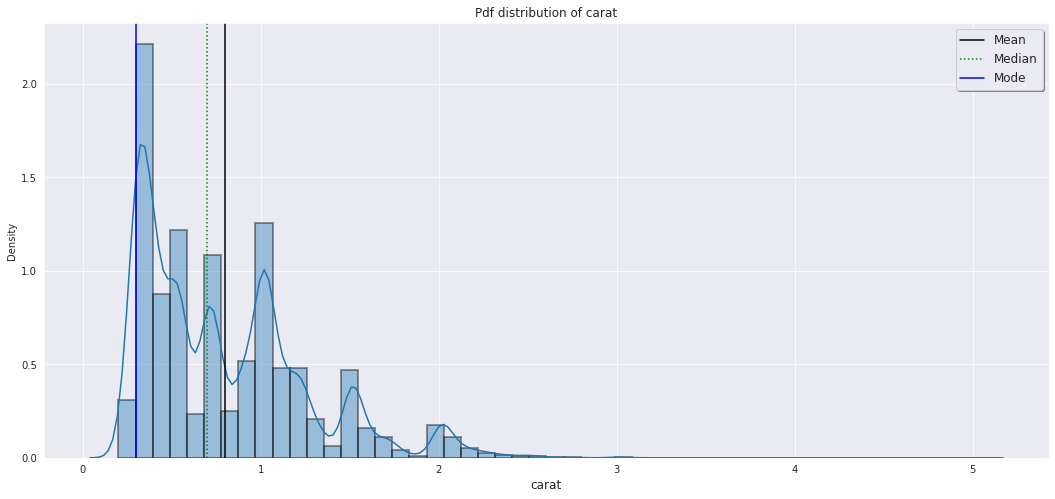

In [ ]:
pdf('carat')

In [ ]:
pd.set_option('display.max_rows', 273)
df['carat'].value_counts(ascending = False)

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
1.00    1558
0.90    1485
0.41    1382
0.40    1299
0.71    1294
0.50    1258
0.33    1189
0.51    1127
0.34     910
1.02     883
0.52     817
1.51     807
1.50     793
0.72     764
0.53     709
0.42     706
0.38     670
0.35     667
1.20     645
0.54     625
0.36     572
0.91     570
1.03     523
0.55     496
0.73     492
0.56     492
0.43     488
1.04     475
1.21     473
2.01     440
0.57     430
0.39     398
0.37     394
1.52     381
1.06     373
1.05     361
1.07     342
0.74     322
0.58     310
1.11     308
1.22     300
0.23     293
1.09     287
0.80     284
0.59     282
1.23     279
1.10     278
2.00     265
0.24     254
0.26     253
0.77     251
1.12     251
0.76     251
0.75     249
1.08     246
1.13     246
1.24     236
0.27     233
0.60     228
0.92     226
1.53     220
1.70     215
0.44     212
0.25     212
1.14     207
0.61     204
0.81     200
0.28     198
0.78     187
1.25     187
0.46     178
2.02     177

**IN this Carat feature max values counts 0.3 carat to 2.03 carat**

### Histogram analysis

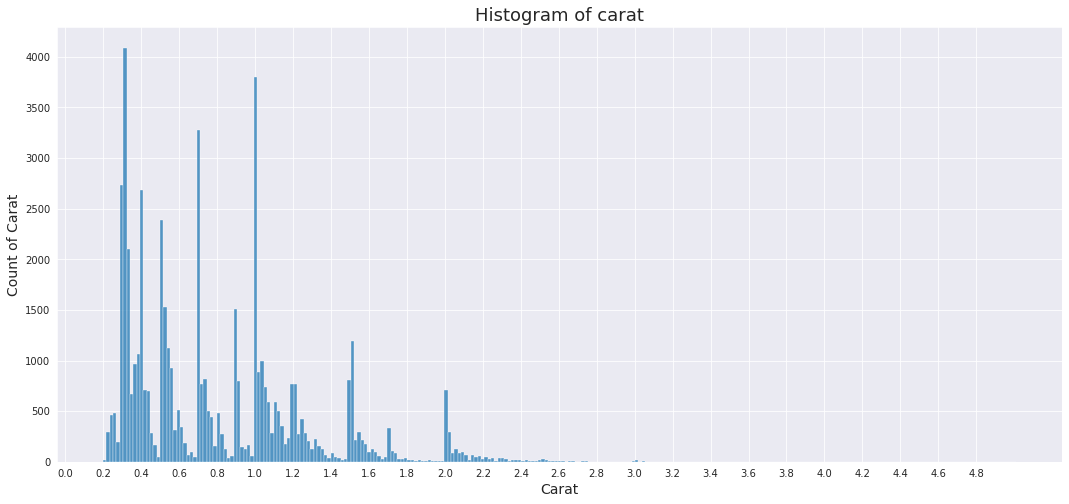

In [ ]:
plt.figure(figsize =(18,8))
sns.histplot(x  = df['carat'], bins= 273)
plt.xticks(np.arange(0,5,0.2),rotation= 0)
plt.title("Histogram of {}".format('carat'),fontsize=18)
plt.xlabel('Carat',fontsize = 14)
plt.ylabel('Count of Carat',fontsize = 14)

plt.show()


**In this dataset most occured diamonds 0.30, 0.31 and 1.01 of carat**

### boxplot analysis 

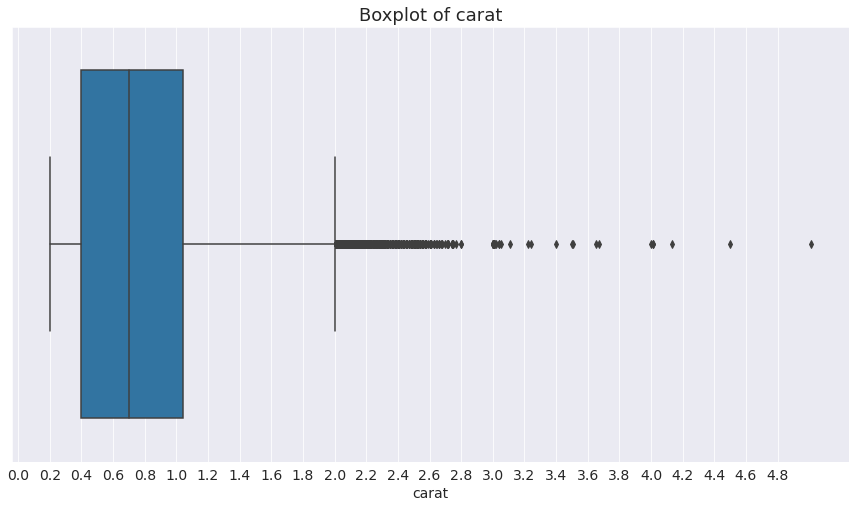

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(df['carat'])
plt.xticks(np.arange(0,5,0.2),rotation= 0,fontsize = 14)
plt.xlabel('carat', fontsize = 14)
plt.title("Boxplot of {}".format('carat'),fontsize=18)
plt.show()

In [ ]:
df.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

Outliers start from 2 carat

### Counplot analysis

In [ ]:
# plt.figure(figsize=(15,8))
# sns.countplot(df['carat'])
# plt.xticks(rotation= 90)
# plt.show()

## Univariate analysis of color variable
### this is categorical value

In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

Text(0.5, 1.0, 'Countplot of Cut')

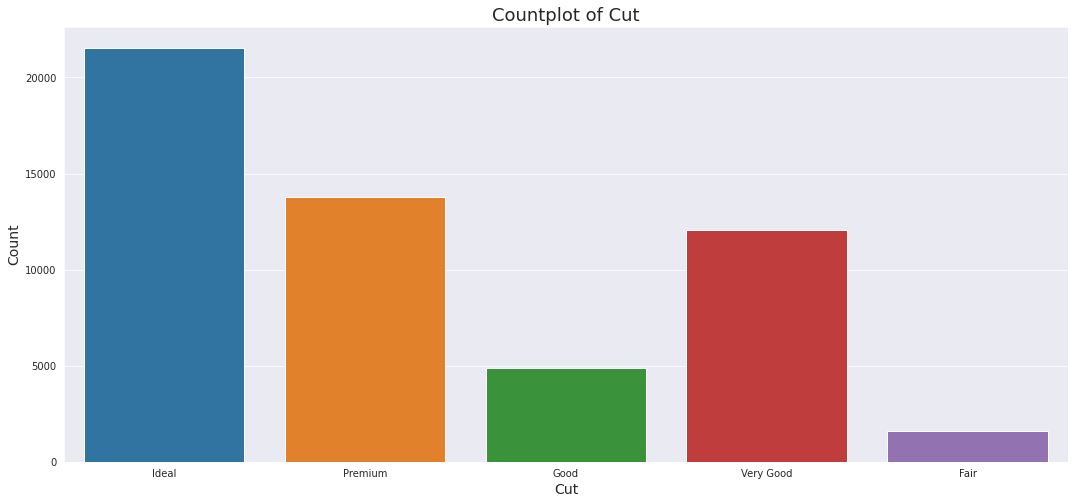

In [ ]:
plt.figure(figsize =(18,8))
sns.countplot(x =df.cut)
plt.xlabel('Cut', fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.title("Countplot of {}".format('Cut'),fontsize=18)

**Ideal:21551,Premium:13791,Very Good:12082,Good: 4906,Fair:1610** In this dataset max values present of Ideal cut

## Univariate analysis of Cut variable
### this is categorical value
color : diamond colour, from J (worst) to D (best)

In [ ]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In the data descroption D denotes the best and J is the worst diamond 
<br>so we can arange diamond  **D > E > F > G > H > I > J**

In [ ]:
df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

Medium level diamond are present in maximum range and bad quality diamond are present in very less range

Text(0.5, 1.0, 'Countplot of Color')

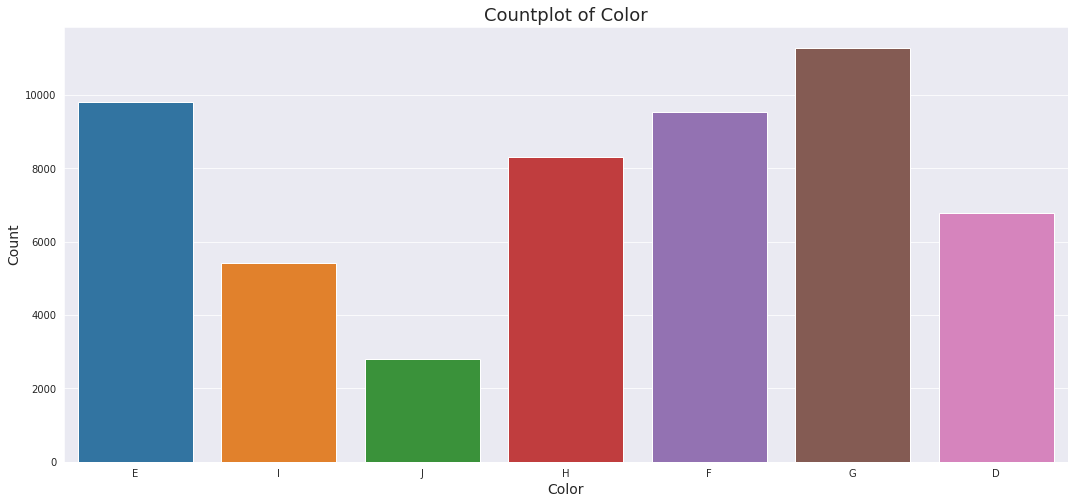

In [ ]:
plt.figure(figsize =(18,8))
sns.countplot(x =df.color)
plt.xlabel('Color', fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.title("Countplot of {}".format('Color'),fontsize=18)

## Univariate analysis of clarity variable
### This is categorical value
clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

In the data descroption IF denotes the best and I1 is the worst diamond
<br>so we can arange diamond **(worst)I1 < SI2 < SI1 < VS2 < VS1 < VVS2 < VVS1 < IF (best)**

In [ ]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

Text(0.5, 1.0, 'Countplot of Clarity')

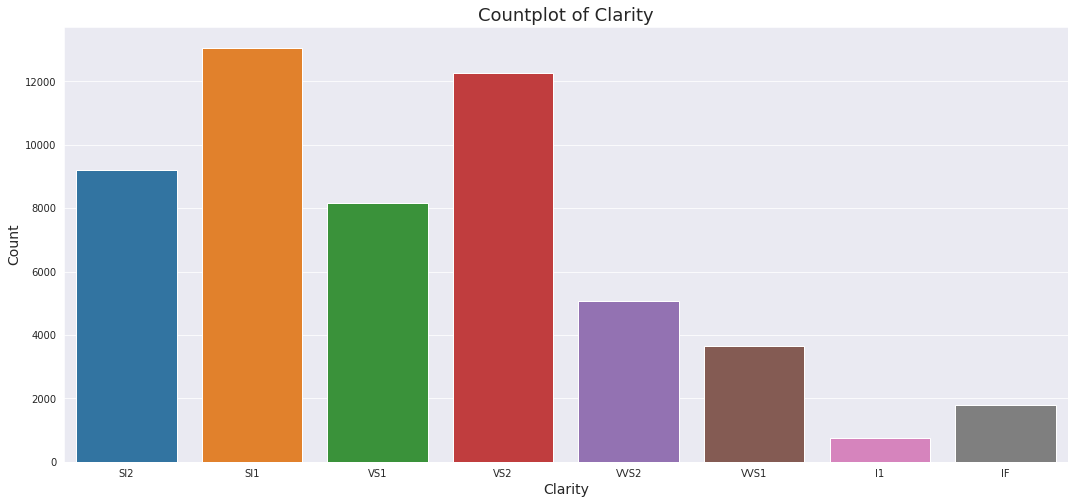

In [ ]:
plt.figure(figsize =(18,8))
sns.countplot(x =df.clarity)
plt.xlabel('Clarity', fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.title("Countplot of {}".format('Clarity'),fontsize=18)

min values= I1(741) 
<br>Max values= SI1(13065) worst diamonds are less 

## Univariate analysis of clarity variable
### This is Numrical value
depth : total depth percentage = $\frac{z}{ mean(x, y)} =\frac {2 * z}{(x + y)}$ (43 to 79)

In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
df.depth.dtype

dtype('float64')

**Probability Density analysis**

Skewness of depth :-0.08
Kurtosis of depth :5.74
mean of depth :61.75
median of depth :61.8
mode of depth :62.0


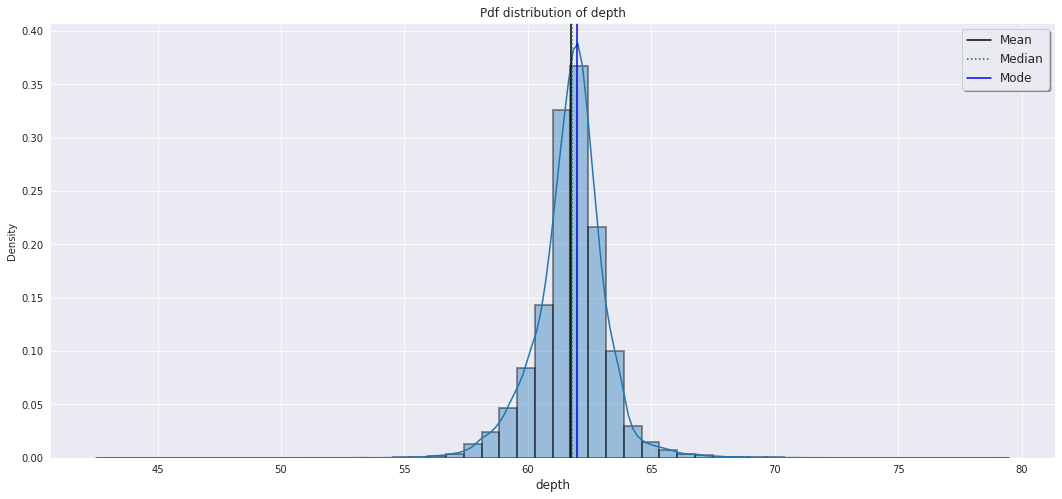

In [ ]:
pdf('depth')

**Histogram Analysis**

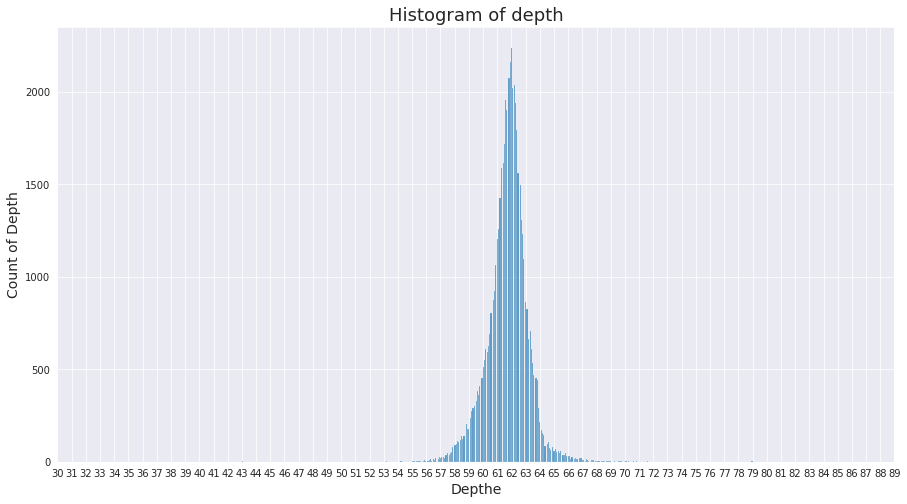

In [ ]:

plt.figure(figsize =(15,8))
sns.histplot(x  = df['depth'])
plt.xlim(50,71)

plt.xticks(range(30,90),rotation= 0)
plt.title("Histogram of {}".format('depth'),fontsize=18)
plt.xlabel('Depthe',fontsize = 14)
plt.ylabel('Count of Depth',fontsize = 14)


plt.show()

**Boxplot Analysis**

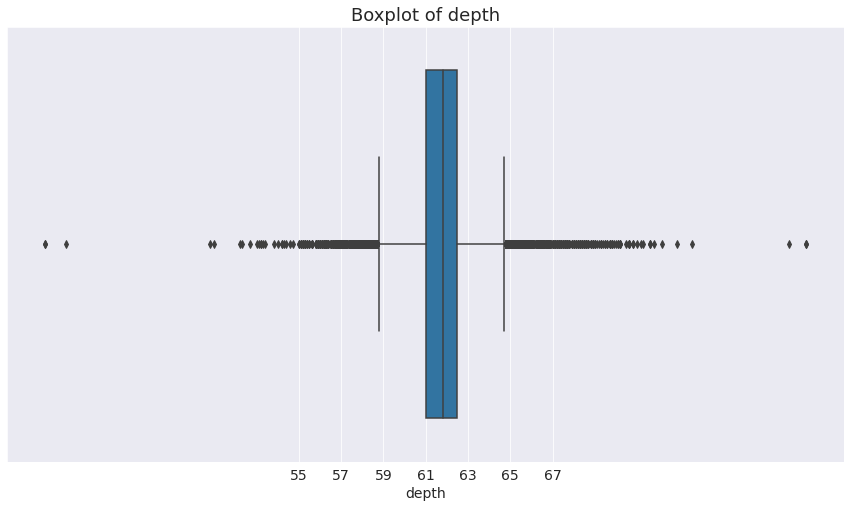

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(df['depth'])
plt.xticks(np.arange(55,68,2),rotation= 0,fontsize = 14)
plt.xlabel('depth', fontsize = 14)
plt.title("Boxplot of {}".format('depth'),fontsize=18)
plt.show()

In [ ]:
df['depth'].describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

**present oulliers < 59 to 56 no outliers < presentoutliers**

### Countplot Analysis 

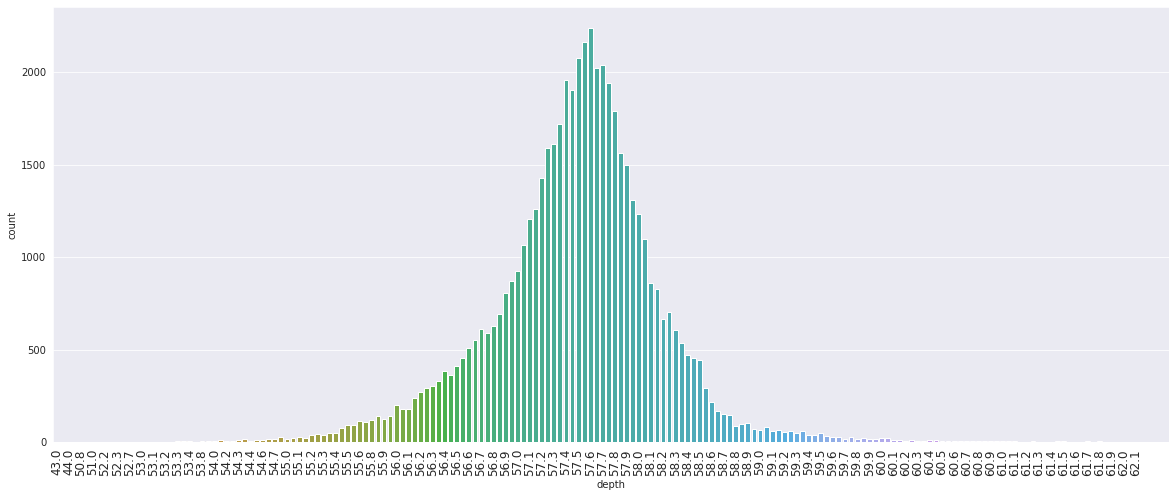

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(df['depth'])
plt.xticks(np.arange(0,180,2),rotation= 90,fontsize = 12)
plt.show()

## Univariate analysis of clarity variable
### This is Numrical value

In [ ]:
df[['x','y','z']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       53940 non-null  float64
 1   y       53940 non-null  float64
 2   z       53940 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


x : length in mm (0--10.74)

y : width in mm (0--58.9)

z : depth in mm (0--31.8)

### x : length in mm (0--10.74)
**Probability density Analysis**

Skewness of x :0.38
Kurtosis of x :-0.62
mean of x :5.73
median of x :5.7
mode of x :4.37


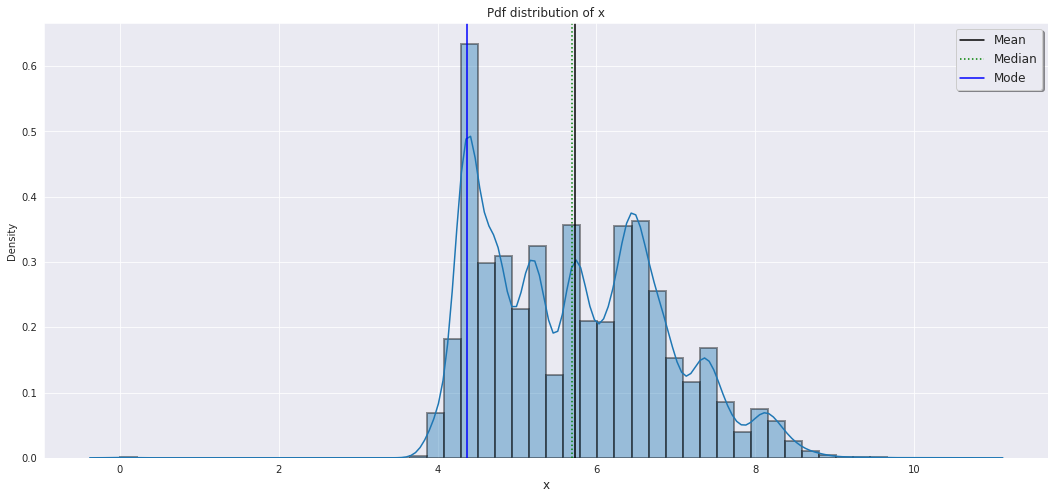

In [ ]:
pdf('x')

**Histogram analysis of Diamonds lenght**

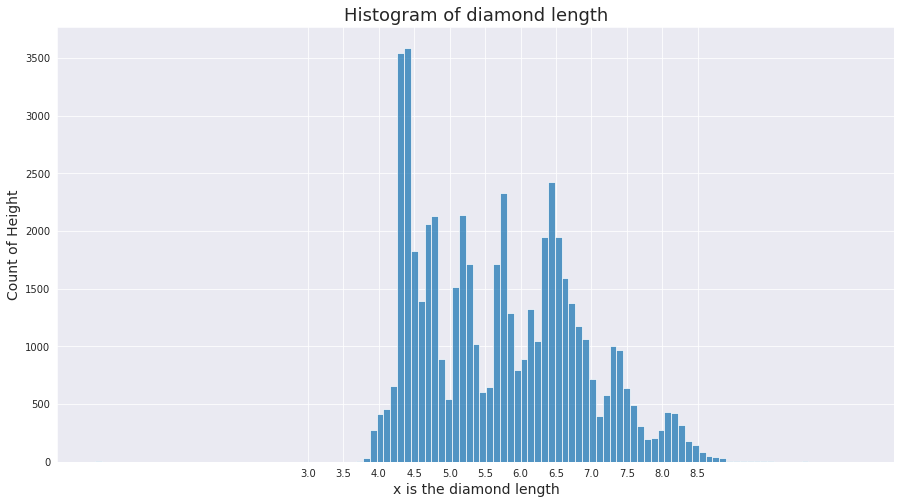

In [ ]:
plt.figure(figsize =(15,8))
sns.histplot(x  = df['x'])
plt.xticks(np.arange(3,9,0.5),rotation= 0)
plt.title("Histogram of {}".format('diamond length'),fontsize=18)
plt.xlabel('x is the diamond length',fontsize = 14)
plt.ylabel('Count of Height',fontsize = 14)

plt.show()

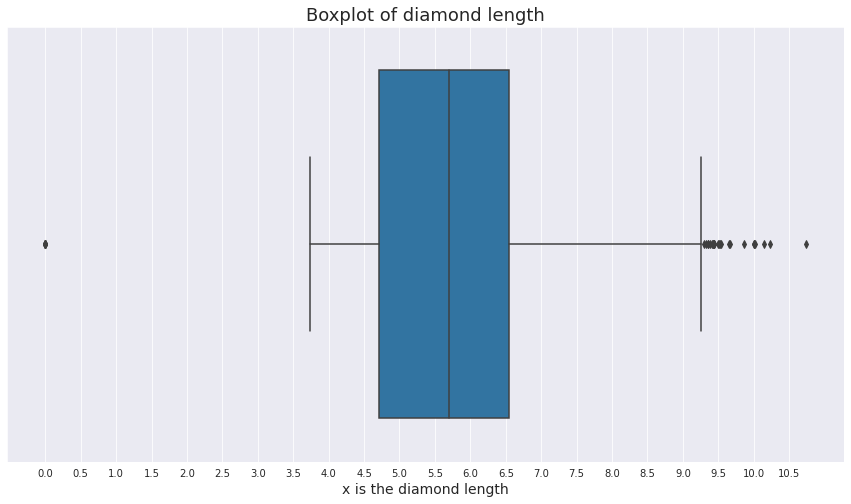

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(df['x'])
plt.xticks(np.arange(0,11,0.5),rotation= 0)
plt.xlabel('x is the diamond length', fontsize = 14)
plt.title("Boxplot of {}".format('diamond length'),fontsize=18)
plt.show()

present outliers < **3.75 diamond length to 9.25 diamond length** < present outliers

In [ ]:
df['x'].describe()

count    53940.000000
mean         5.731157
std          1.121761
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64

### Counplot Analysis

In [ ]:
# plt.figure(figsize=(20,8))
# sns.countplot(df['x'])
# plt.xticks(rotation= 90,fontsize = 10)
# plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
df['x'].value_counts()

4.37     448
4.34     437
4.33     429
4.38     428
4.32     425
4.35     407
4.39     388
4.31     387
4.36     386
4.40     373
4.42     362
4.30     361
4.41     359
4.29     321
4.28     321
4.43     297
4.46     278
4.77     277
4.44     276
4.74     274
4.45     273
4.75     269
5.72     269
5.73     268
6.43     267
5.74     261
6.37     260
4.79     259
6.47     258
4.27     258
4.78     257
6.39     256
6.45     254
6.41     254
4.80     253
6.38     250
4.76     249
4.47     248
5.75     248
6.49     247
5.70     245
5.71     243
5.76     242
6.42     239
5.68     236
5.69     235
4.73     235
5.12     235
5.19     234
6.44     231
5.16     231
6.40     230
5.17     229
6.53     228
6.34     228
4.72     226
6.36     225
6.51     223
4.48     222
5.18     219
6.46     218
6.54     217
6.50     215
6.55     215
4.70     214
5.13     214
6.52     214
6.48     214
4.71     210
5.77     210
5.67     210
5.14     209
5.21     208
5.15     206
4.49     205
6.56     205
5.66     204

### y : width in mm (0--58.9)
**Probability Density Analysis**

Skewness of y :2.43
Kurtosis of y :91.21
mean of y :5.73
median of y :5.71
mode of y :4.34


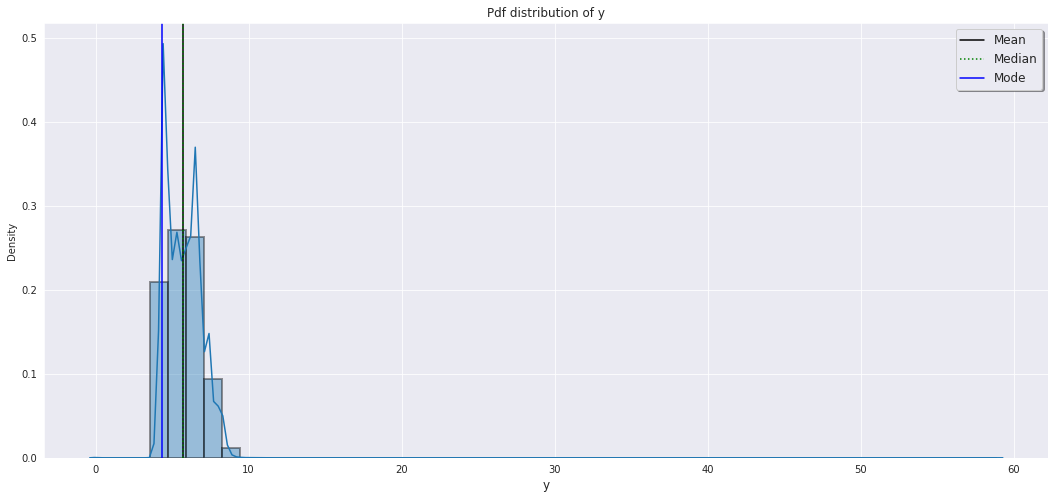

In [ ]:
pdf('y')

**Hisogram Analysis**

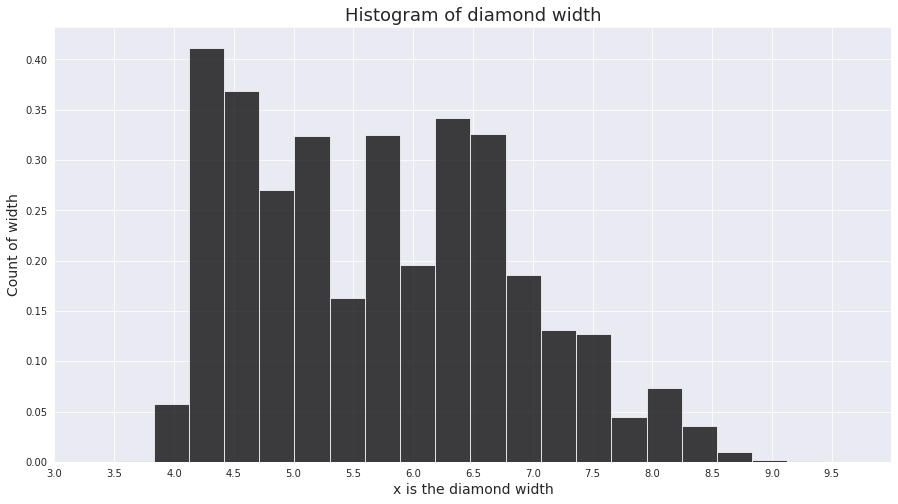

In [ ]:
plt.figure(figsize =(15,8))
plt.hist(x  = df['y'], bins=200, density=1000, facecolor='black', alpha=.75)
plt.xticks(np.arange(0,10,0.5),rotation= 0)


plt.xlim(3, 10)

plt.title("Histogram of {}".format('diamond width'),fontsize=18)
plt.xlabel('x is the diamond width',fontsize = 14)
plt.ylabel('Count of width',fontsize = 14)
plt.show()

**Boxplot Analysis**

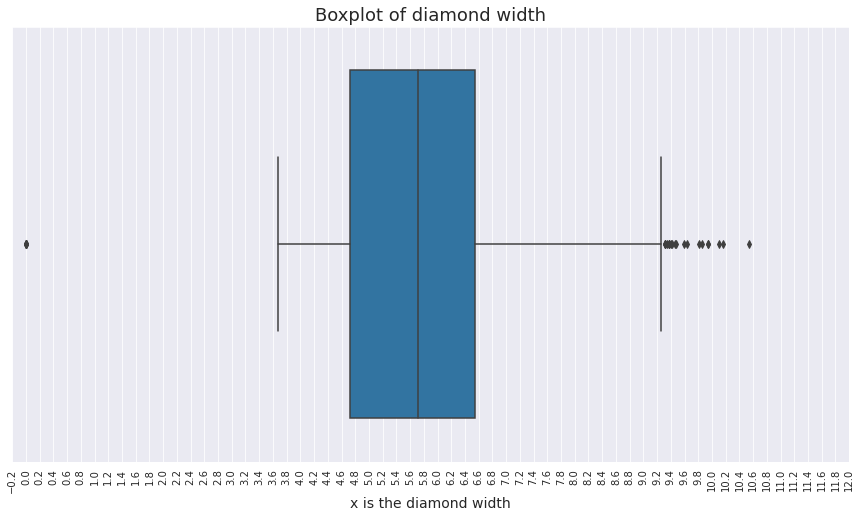

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(df['y'])
plt.xticks(np.arange(-1,60,0.2),rotation= 90)
plt.xlim(-0.2, 12)
plt.xlabel('x is the diamond width', fontsize = 14)
plt.title("Boxplot of {}".format('diamond width'),fontsize=18)
plt.show()

present outliers < **3.8 diamond width to 9.1 diamond width** < present outliers

In [ ]:
df['y'].describe()

count    53940.000000
mean         5.734526
std          1.142135
min          0.000000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64

**Countplot Analysis**

In [ ]:
# plt.figure(figsize=(20,8))
# sns.countplot(df['y'])
# plt.xticks(rotation= 90,fontsize = 10)
# plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
df['y'].value_counts()

4.34     437
4.37     435
4.35     425
4.33     421
4.32     414
4.39     407
4.38     406
4.40     387
4.31     386
4.41     384
4.36     383
4.42     365
4.30     334
4.43     326
4.45     308
4.44     307
4.29     300
4.79     289
5.75     278
4.77     276
4.74     276
4.46     275
6.41     274
4.28     271
5.76     265
5.74     265
4.75     261
4.78     260
4.47     258
4.80     258
4.76     257
5.72     257
6.47     255
6.38     253
6.39     248
6.46     248
4.70     245
6.49     245
6.45     245
6.50     244
6.40     242
6.51     241
6.37     241
5.73     241
4.48     240
6.42     238
6.43     234
5.77     234
6.44     231
5.70     231
6.54     228
5.78     227
5.79     226
4.72     224
5.16     224
4.73     222
5.24     222
6.35     220
4.49     220
4.82     219
6.36     219
5.19     219
6.48     218
5.12     218
5.18     215
6.53     214
5.14     213
4.71     213
4.81     211
5.80     210
5.20     209
5.71     209
4.50     206
5.13     205
5.21     205
5.28     205
5.11     204

### z : depth in mm (0--31.8)
**Probability Density Analysis**

Skewness of z :1.52
Kurtosis of z :47.09
mean of z :3.54
median of z :3.53
mode of z :2.7


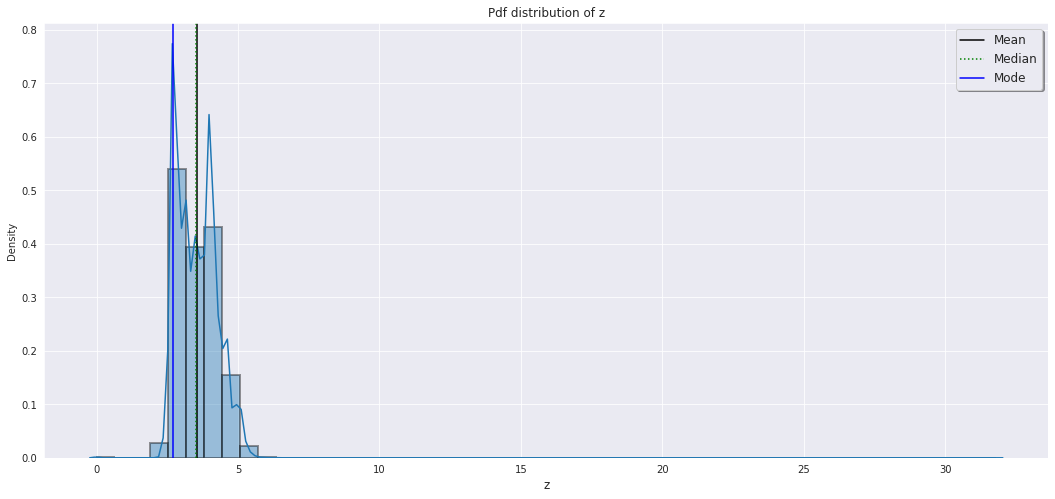

In [ ]:
pdf('z')

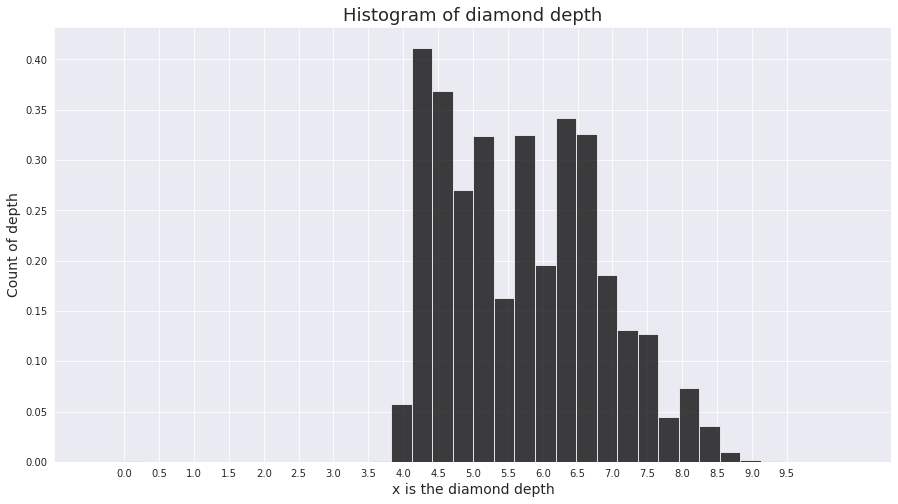

In [ ]:
plt.figure(figsize =(15,8))
plt.hist(x  = df['y'], bins=200, density=1000, facecolor='black', alpha=.75)
plt.xticks(np.arange(0,10,0.5),rotation= 0)
plt.xlim(-1, 11)
plt.title("Histogram of {}".format('diamond depth'),fontsize=18)
plt.xlabel('x is the diamond depth',fontsize = 14)
plt.ylabel('Count of depth',fontsize = 14)
plt.show()

Boxplot Analysis

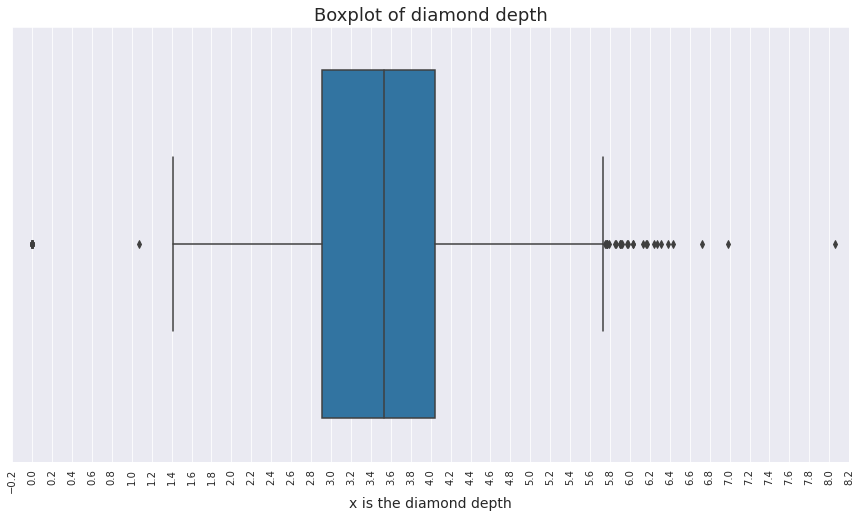

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(df['z'])
plt.xticks(np.arange(-1,60,0.2),rotation= 90)
plt.xlim(-0.2, 8.2)
plt.xlabel('x is the diamond depth', fontsize = 14)
plt.title("Boxplot of {}".format('diamond depth'),fontsize=18)
plt.show()

present outliers < **1.4 diamond depth to 5.8 diamond depth** < present outliers

In [ ]:
df['z'].describe()

count    53940.000000
mean         3.538734
std          0.705699
min          0.000000
25%          2.910000
50%          3.530000
75%          4.040000
max         31.800000
Name: z, dtype: float64

### Countplot Analysis

In [ ]:
# plt.figure(figsize=(20,8))
# sns.countplot(df['z'])
# plt.xticks(rotation= 90,fontsize = 10)
# plt.show()

## Bivariate Analysis

In [ ]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

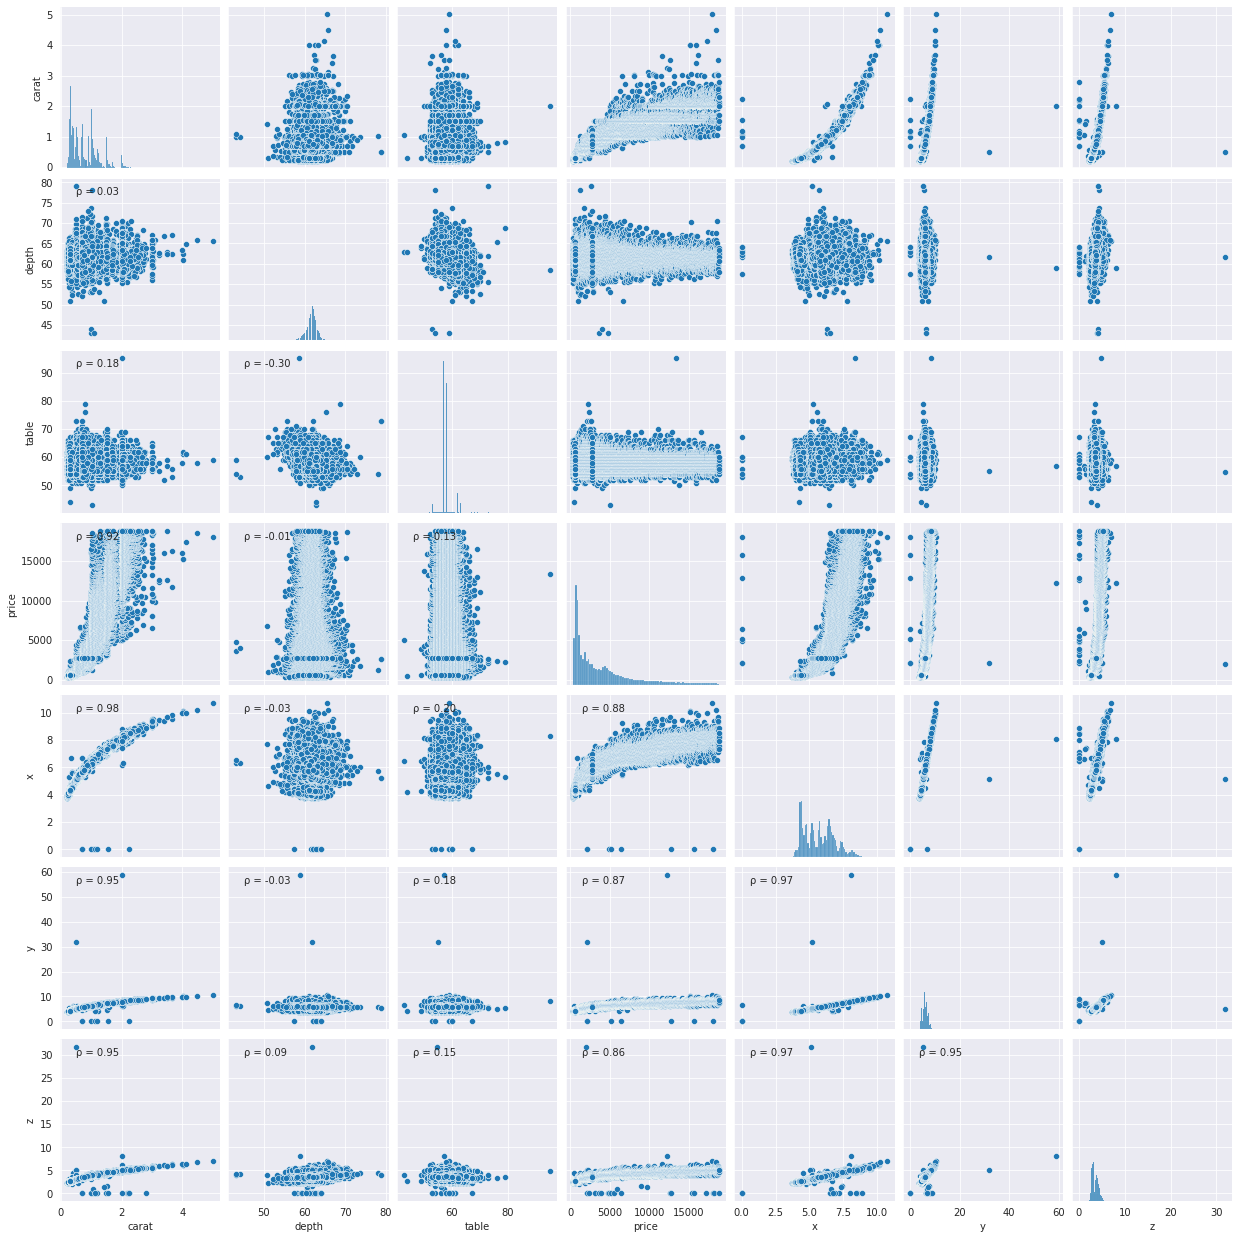

In [ ]:
g = sns.pairplot(df)
g.map_lower(corrfunc)
plt.show()

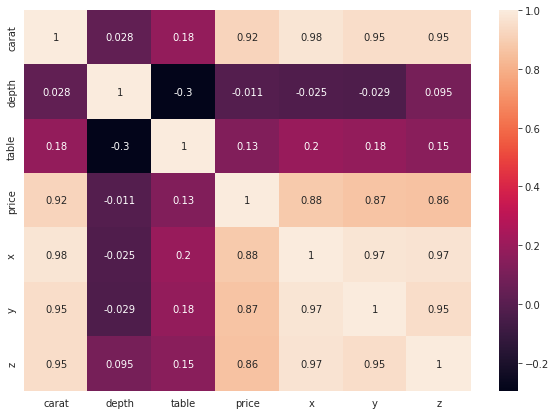

In [ ]:
plt.figure(figsize =(10,7))
sns.heatmap(df.corr(),annot =True)

<b>From above graphs we conclude that </b>
<li><b>price</b> to carat have 0.92 correlation</li>
<li>carat to length(x) have 0.92 correlation</li>
<li>carat to width(y) have 0.98 correlation    </li>
<li>carat to depth(z) have 0.95 correlation  </li>  
<li><b>price</b> to length(x) have 0.88 correlation </li>   
<li><b>price</b> to width(y) have 0.87 correlation  </li>      
<li><b>price</b> to depth(z) have 0.86 correlation  </li>      
<li>length(x) to width(y) have 0.97 correlation  </li>      
<li>length(x) to depth(z) have 0.97 correlation </li>
<li>width(y) to depth(z) have 0.95 correlation</li>
<li>table to depth have -0.3 correlation  </li>
<br>
<b>column "price" is the values to be predicted</b>

Most effective variables are those having storng correlation with price hence those variables are very much effective to predict diamond price 

In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Bivariate analysis of Price to Carat

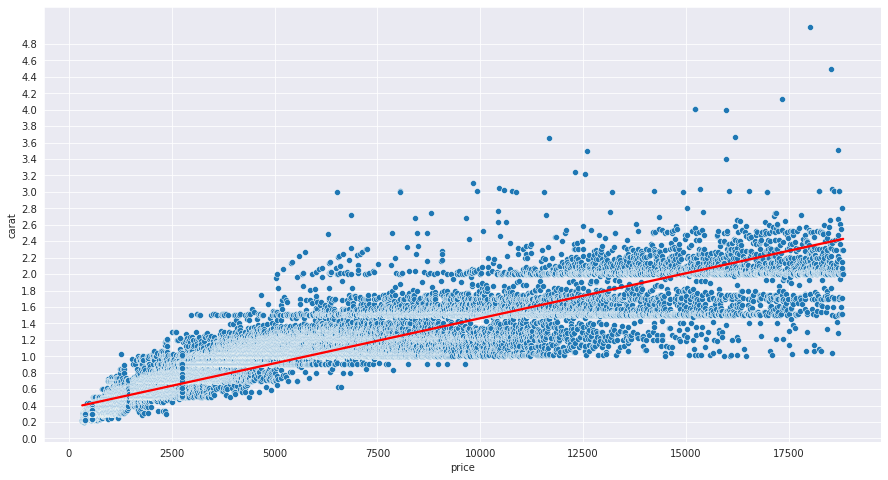

In [ ]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = 'price' , y ='carat' ,data = df)
plt.yticks(np.arange(0,5,0.2))
sns.regplot(x='price', y='carat',data = df, scatter=False,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

carat In creases price also increases but most of the data lises between 0.8 to 1.5 carate,1.5 to 1.8 carat,2.0 to 2.2
also having slightly linear relation

<Figure size 1296x360 with 0 Axes>

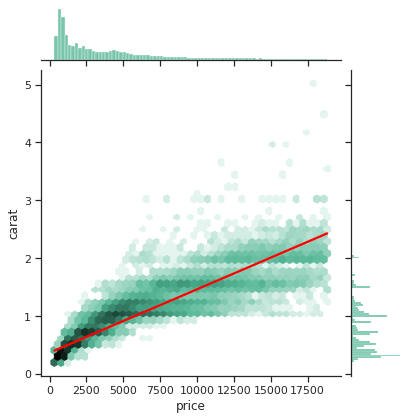

In [ ]:
plt.figure(figsize = (18,5))
sns.set_theme(style="ticks")
g =sns.jointplot(x='price', y='carat',data = df, kind="hex", color="#4CB391",joint_kws={'gridsize':40, 'bins':'log'})
sns.regplot(x='price', y='carat',data = df, ax=g.ax_joint, scatter=False,scatter_kws={"color": "black"}, line_kws={"color": "red"})

### Bivariate analysis of Cut to Carat,Price
<b>Diamond cut is categorical variable and carat is numrical 

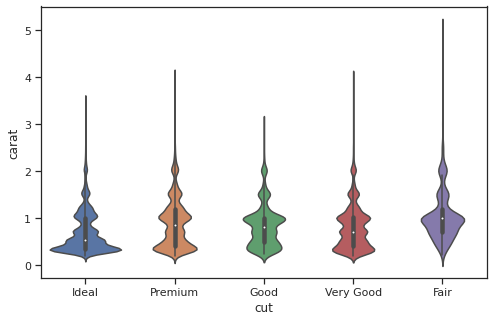

In [ ]:
plt.figure(figsize = (8,5))
sns.violinplot(x = 'cut', y = 'carat', data = df)

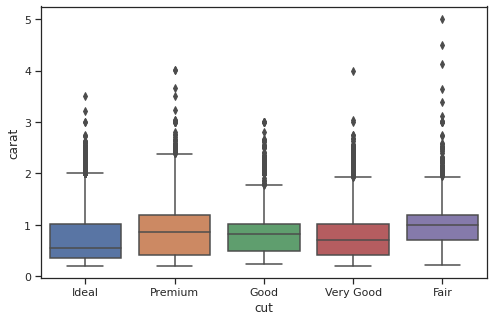

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(x = 'cut',y = 'carat',data = df)

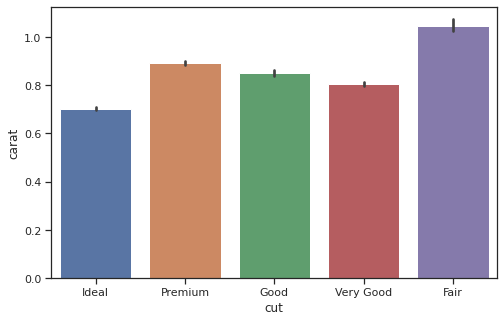

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'cut',y = 'carat',data = df)

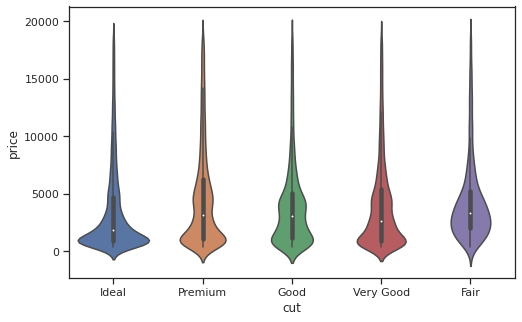

In [ ]:
plt.figure(figsize = (8,5))
sns.violinplot(x = 'cut', y = 'price', data = df)

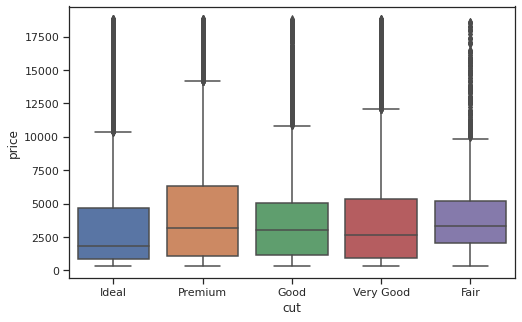

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(x = 'cut',y = 'price',data = df)

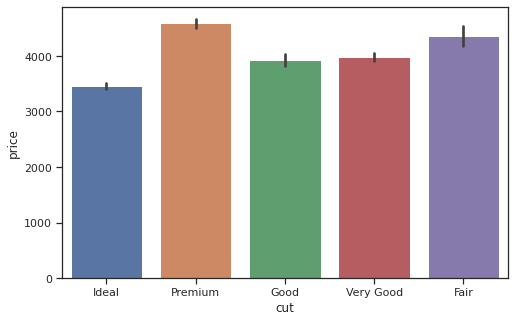

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'cut',y = 'price',data = df)
plt.show()

In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Multivariate analysis of carat(N),price(N) and cut(C) byusing the Scaterplot

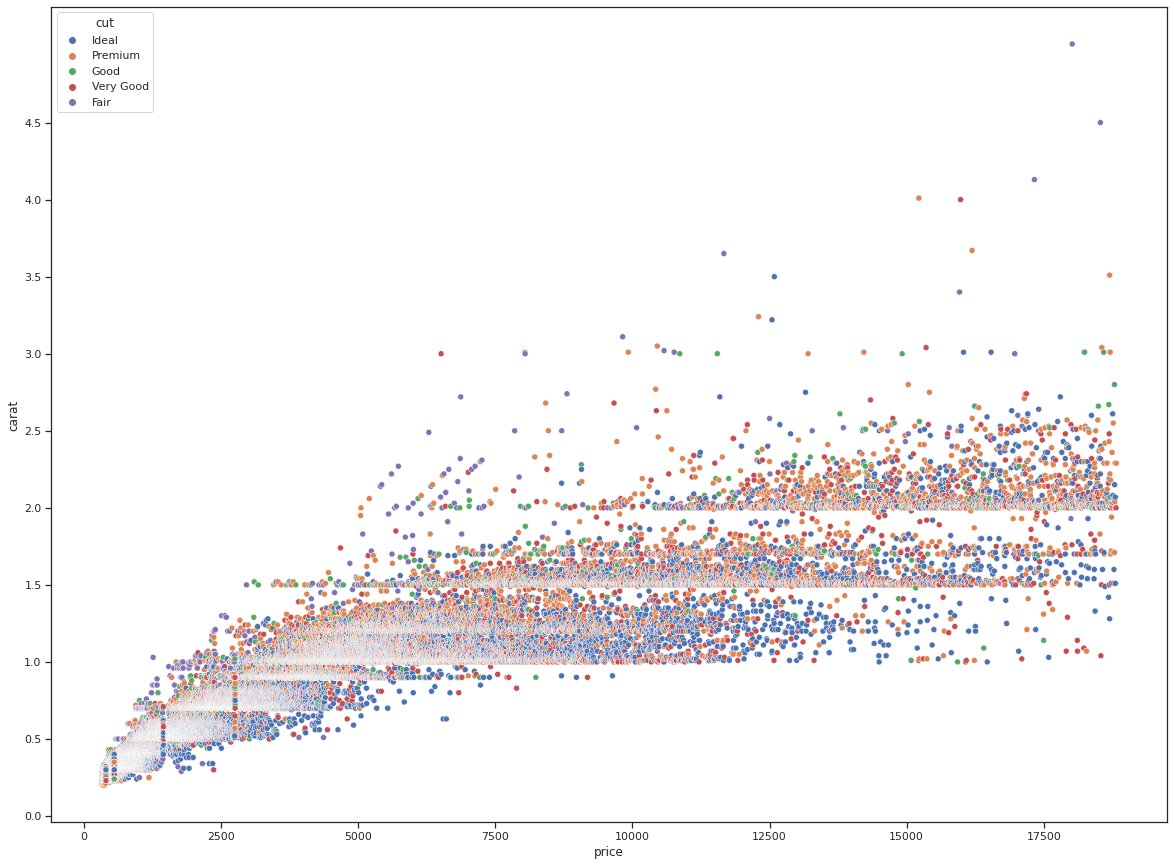

In [ ]:
plt.figure(figsize = (20,15))
sns.scatterplot(y='carat',x = 'price',hue = 'cut', data = df)
plt.yticks(np.arange(0,5,0.5))
plt.show()

### Bivariate analysis of color to Carat,Price
<b>Diamond color is categorical variable and carat,Price is numrical 

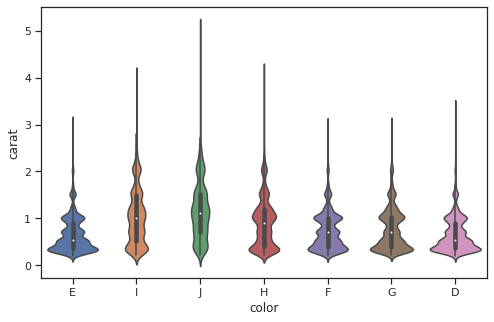

In [ ]:
#color to carat
plt.figure(figsize = (8,5))
sns.violinplot(x = 'color', y = 'carat', data = df)

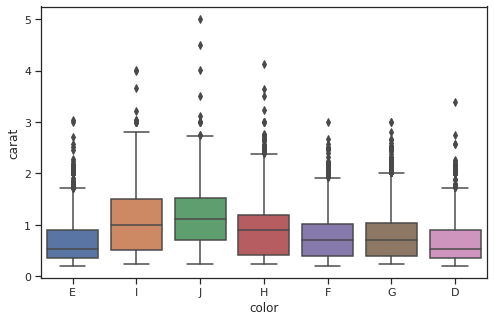

In [ ]:
#color to carat

plt.figure(figsize = (8,5))
sns.boxplot(x = 'color',y = 'carat',data = df)

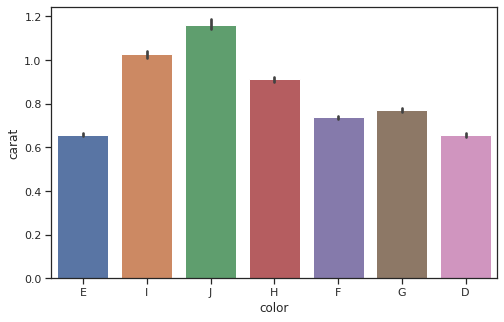

In [ ]:
#color to carat

plt.figure(figsize = (8,5))
sns.barplot(x = 'color',y = 'carat',data = df)

### color to price

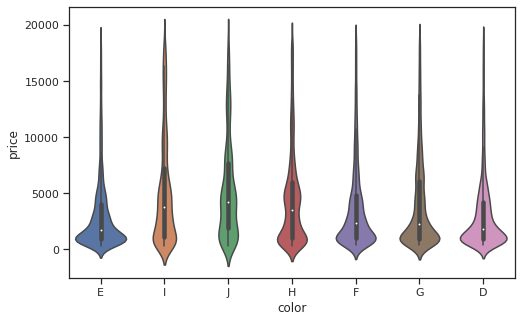

In [ ]:


plt.figure(figsize = (8,5))
sns.violinplot(x = 'color', y = 'price', data = df)

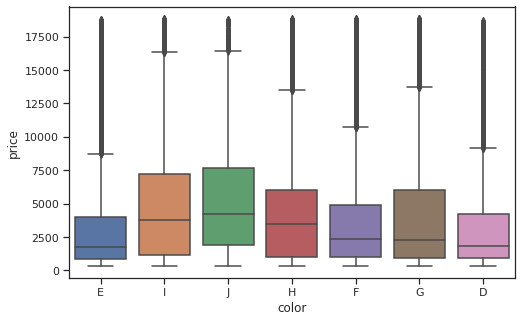

In [ ]:
plt.figure(figsize = (8,5))
sns.boxplot(x = 'color',y = 'price',data = df)

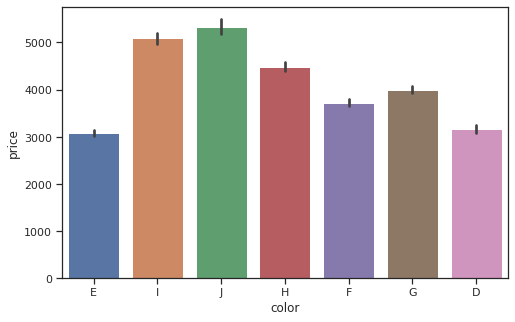

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'color',y = 'price',data = df)

In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Multivariate analysis of carat(N),price(N) and color(C) byusing the Scaterplot

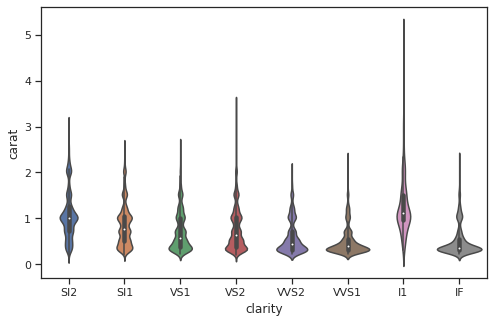

In [ ]:
#color to carat
plt.figure(figsize = (8,5))
sns.violinplot(x = 'clarity', y = 'carat', data = df)

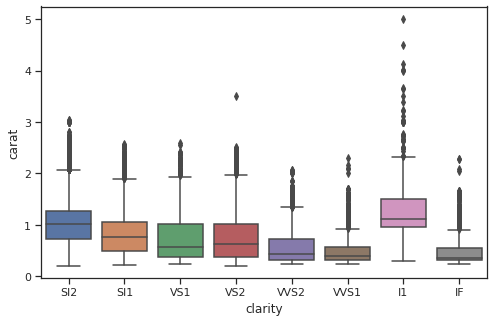

In [ ]:

plt.figure(figsize = (8,5))
sns.boxplot(x = 'clarity',y = 'carat',data = df)

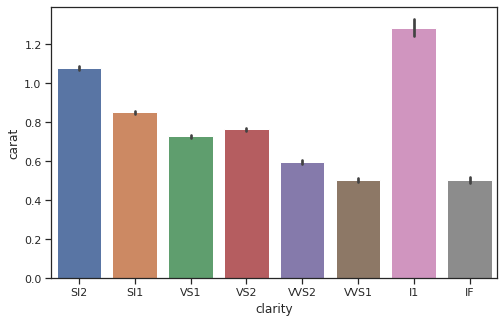

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = 'clarity',y = 'carat',data = df)

### One hot encoding of categorical values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df[['cut','color','clarity']].head(10)

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
5,Very Good,J,VVS2
6,Very Good,I,VVS1
7,Very Good,H,SI1
8,Fair,E,VS2
9,Very Good,H,VS1


In [ ]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
df['cut']= df['cut'].map({'Fair':0 ,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}).astype(int)
df['color']= df['color'].map({'J':0 ,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6}).astype(int)
df['clarity']= df['clarity'].map({'I1':0 ,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}).astype(int)

In [ ]:
df[['cut','color','clarity']].head(10)

,cut,color,clarity
0,4,5,1
1,3,5,2
2,1,5,4
3,3,1,3
4,1,0,1
5,2,0,5
6,2,1,6
7,2,2,2
8,0,5,3
9,2,2,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


### Feature Engineering

In [ ]:
df['volume'] = df['x']*df['y']*df['z']

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [ ]:
df.drop(['x','y','z'], axis =1 , inplace = True)

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,4,5,1,61.5,55.0,326,38.202030
1,0.21,3,5,2,59.8,61.0,326,34.505856
2,0.23,1,5,4,56.9,65.0,327,38.076885
3,0.29,3,1,3,62.4,58.0,334,46.724580
4,0.31,1,0,1,63.3,58.0,335,51.917250


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   volume   53940 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 3.3 MB


Splitting data into train test split

In [ ]:
x = df.drop(['price'], axis = 1)
y = df['price']

In [ ]:
x.head()

,carat,cut,color,clarity,depth,table,volume
0,0.23,4,5,1,61.5,55.0,38.202030
1,0.21,3,5,2,59.8,61.0,34.505856
2,0.23,1,5,4,56.9,65.0,38.076885
3,0.29,3,1,3,62.4,58.0,46.724580
4,0.31,1,0,1,63.3,58.0,51.917250


In [ ]:
dummy_color = pd.get_dummies(df['color'], drop_first=True)
dummy_cut = pd.get_dummies(df['cut'], drop_first=True)
dummy_clarity = pd.get_dummies(df['clarity'], drop_first=True)

dummy = pd.concat([dummy_cut,dummy_color,dummy_clarity], axis =1)

In [ ]:
dummy.head()


,1,2,3,4,1,2,3,4,5,6,1,2,3,4,5,6,7
0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
dummy= np.array(dummy)

In [ ]:
dummy

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Standardization of Continuous Variable 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
x.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'volume'], dtype='object')

In [ ]:
x_std = sc.fit_transform(x[['carat', 'depth', 'table', 'volume']])

In [ ]:
x_std

array([[-1.19816781, -0.17409151, -1.09967199, -1.17129422],
       [-1.24036129, -1.36073849,  1.58552871, -1.21853297],
       [-1.19816781, -3.38501862,  3.37566251, -1.17289363],
       ...,
       [-0.20662095,  0.73334442,  1.13799526, -0.19681471],
       [ 0.13092691, -0.52310533,  0.24292836,  0.1395205 ],
       [-0.10113725,  0.31452784, -1.09967199, -0.06749301]])

In [ ]:
x = np.concatenate((dummy,x_std), axis= 1)

In [ ]:
x.shape

(53940, 21)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.25, random_state = 123)

## Creating model KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()

In [ ]:
reg.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
y_pred = reg.predict(x_train)

In [ ]:
reg.score(x_train,y_train)

0.967012110648385

In [ ]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_val = [] 
for K in range(10):
    K = K+1
    model = KNeighborsRegressor(n_neighbors=K)

    model.fit(x_train, y_train)  
    pred = model.predict(x_test)  
    error = sqrt(mean_squared_error(y_test, pred))  
    rmse_val.append(error)  
    print('RMSE value for k = ', K, 'is:', error)

RMSE value for k =  1 is: 1000.1655481063301
RMSE value for k =  2 is: 913.0018814240586
RMSE value for k =  3 is: 888.8807362776548
RMSE value for k =  4 is: 881.8039987038757
RMSE value for k =  5 is: 885.9385582313639
RMSE value for k =  6 is: 892.4984472976447
RMSE value for k =  7 is: 908.1042052403233
RMSE value for k =  8 is: 919.7662612102633
RMSE value for k =  9 is: 929.4644717951602
RMSE value for k =  10 is: 940.5381305076478


In [ ]:
x_train.shape

(40455, 21)

In [ ]:
y_train.shape

(40455,)

In [ ]:
Y_train = np.array(y_train).reshape(-1,1)

In [ ]:
Y_test= np.array(y_test).reshape(-1,1)

In [ ]:
Y_train.shape

(40455, 1)

In [ ]:
y_pred = np.array(y_pred).reshape(-1,1)

In [ ]:
y_pred.shape

(40455, 1)

In [ ]:
y_train.shape

(40455,)

In [ ]:
y_pred.shape

(40455, 1)

## K Nearest Neighbours from skratch

In [ ]:
# method 1 
#Importing the required modules
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.stats import mode
 
#Euclidean Distance (pythagorean theorem)
def eucledian(mu,arr):
    dist = np.sqrt(np.sum(np.multiply((mu-arr), (mu-arr))))
    return dist
 
#Function to calculate KNN
def predict(x_train, y , x_input, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for i in x_input: 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train[j,:]) , i) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist) 
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

In [ ]:
%%time
#Applying our function 
y_pred1 = predict(x_train,Y_train,x_test , 4)


KeyboardInterrupt: ignored

In [ ]:
#Checking the accuracy
accuracy_score(y_test, y_pred1)

In [ ]:
from numpy.random import randint
train_idx = xxx = randint(0,150,100)

In [ ]:
train_idx

Finding Euclidean Distance between two vectors
![title](Euclidean.png)



$\vec{u} = x_2 - x_1$
<br>$\vec{v} = y_2 - y_1$

<br>**by pythagorean theorem**
<br>$d = \sqrt{(\vec{u})^2 +(\vec{v})^2}$
<br>$d =\sqrt{(x_2 - x_1)^2 +(y_2 - y_1)^2}$

In [ ]:
# method 2 
from math import sqrt

Calculating Euclidean distance between two vectors 


In [ ]:
%%time
import numpy as np
arr = np.random.randint(100000, size=(1000000, 2))
mu = np.mean(arr, axis=0)
dist = np.sqrt(np.sum((arr - mu)**2, axis=1))
dist = dist.reshape(-1, 1)
np.hstack([arr, dist])

